In [1]:
import pandas as pd
import numpy as np
import six
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df_lines = pd.read_csv("TheOfficeLinesPerCharacter.csv")
df_rating = pd.read_csv("TheOfficeIMDBPerEpisode.csv")

#Set up my master table
df_master = pd.DataFrame(columns = ["season", "episode", "rating"])
characters = df_lines.speaker.value_counts().reset_index(name="count").query("count > 100")["index"]

#Set up season, episode, and rating
episode = 1
season = 1
for i in range(len(df_rating.index)):
    if(season != df_rating.iloc[i]['Season']):
        episode = 1
        season += 1 
    df_master = df_master.append({'season': season, 'episode': episode, 'rating':df_rating.iloc[i]['Rating']}, ignore_index=True)
    episode += 1
      
#Add characters columns
for character in characters:
    df_master[str(character)] = np.NaN
    
#Add lines spoken count for each character
for j in range(len(df_lines.index)):
    speaker = df_lines.iloc[j]['speaker']
    if speaker in df_master.columns:
        season = df_lines.iloc[j]['season']
        episode = df_lines.iloc[j]['episode']
        index = df_master.loc[df_master['season']==season].loc[df_master['episode']==episode].index.values.astype(int)[0]
        if(pd.isna(df_master.at[index,speaker])):
            df_master.at[index,speaker] = 1
        else:
            df_master.at[index,speaker] += 1
    
#Clean up David's data
David_Wallace = df_master['David'] + df_master['David Wallace']
df_master['David'] = David_Wallace
df_master = df_master.drop(columns=['David Wallace'])

In [2]:
#Remove character that appeared in less than 30 episodes
TF = (df_master.isnull())

for col in TF.columns:
        if (TF[col].value_counts()[0] < 30):
            df_master = df_master.drop(columns=[col])
df_master.to_csv("./master.csv")
df_master.head()

,season,episode,rating,Michael,Dwight,Jim,Pam,Andy,Kevin,Angela,...,Phyllis,Kelly,Jan,Toby,Stanley,Meredith,Nellie,Creed,Gabe,Roy
0,1.0,1.0,7.5,97.0,35.0,37.0,46.0,NaN,2.0,5.0,...,2.0,NaN,12.0,NaN,5.0,NaN,NaN,NaN,NaN,5.0
1,1.0,2.0,8.3,103.0,40.0,35.0,26.0,NaN,8.0,4.0,...,NaN,2.0,NaN,2.0,5.0,NaN,NaN,NaN,NaN,NaN
2,1.0,3.0,7.8,69.0,88.0,57.0,44.0,NaN,6.0,5.0,...,NaN,NaN,18.0,NaN,6.0,3.0,NaN,NaN,NaN,NaN
3,1.0,4.0,8.1,111.0,74.0,63.0,37.0,NaN,3.0,9.0,...,5.0,NaN,NaN,7.0,2.0,15.0,NaN,NaN,NaN,3.0
4,1.0,5.0,8.4,134.0,45.0,27.0,17.0,NaN,4.0,6.0,...,4.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,13.0


Min:6.6
Mean:8.248404255319146
Max:9.8
Std:0.5787203349443079


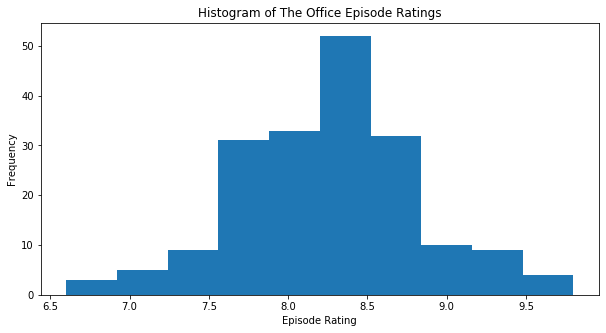

In [3]:
import pylab as pl
import pandas as pd
import numpy as np
import six
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#df_master = pd.read_csv("master.csv")
hist = df_master.hist(column = "rating", sharex=True, sharey=True, figsize=(10,5), grid=False)
pl.title("Histogram of The Office Episode Ratings")
pl.ylabel("Frequency")
pl.xlabel("Episode Rating")

print('Min:' + str(df_master['rating'].min()))
print('Mean:' + str(df_master['rating'].mean()))
print('Max:' + str(df_master['rating'].max()))
print('Std:' + str(df_master['rating'].std()))

In [4]:
#This class was found on stack overflow and simply renders images of my dataframes.
#I am not responsible for this code

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#3b3b3b', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

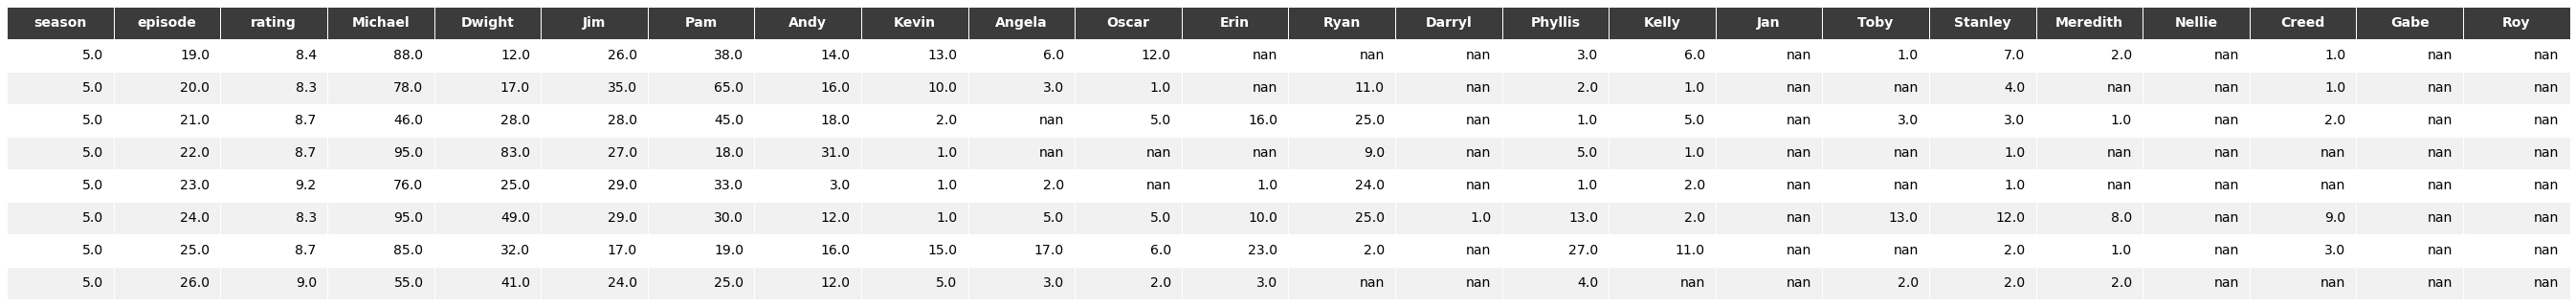

In [5]:
season5 = df_master.loc[df_master['season'] == 5.0]

pd.set_option('display.max_columns', None)
render_mpl_table(season5.iloc[18:26], header_columns=0, col_width=2.0)



In [6]:
#Create a second more condense dataset
df_condensed = pd.DataFrame(columns = ["character", "total lines", "avg lines per appearance"])

total_line = df_master.sum(axis=0)
for k in range(3, df_master.shape[1]):
    character = df_master.columns[k]
    total_appearence = len(df_master[character].loc[df_master[character] != 0])
    
    row = {"character" : character, "total lines" : int(total_line[k]), "avg lines per appearance" : int(total_line[k]/total_appearence)}
    df_condensed = df_condensed.append(row, ignore_index=True)

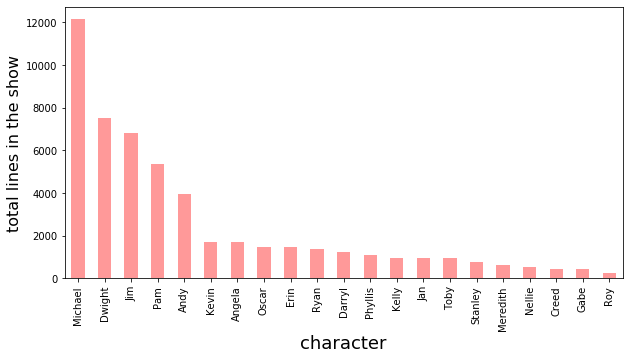

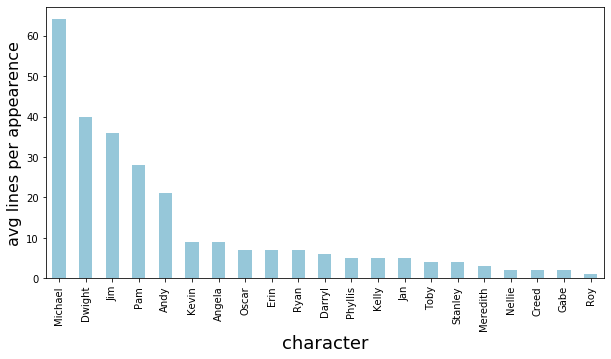

In [7]:
#Graph the current data
df_condensed.plot(x ='character', y='total lines', kind = 'bar', color='#ff9999', figsize=(10,5), legend=None)
plt.xlabel('character', fontsize=18)
plt.ylabel('total lines in the show', fontsize=16)
plt.show()

df_condensed.plot(x ='character', y='avg lines per appearance', kind = 'bar', color='#96c7d9', figsize=(10,5), legend=None)
plt.xlabel('character', fontsize=18)
plt.ylabel('avg lines per appearence', fontsize=16)
plt.show()

# characters = df_condensed.sort_values(by='total lines', ascending=False)['character'].astype(str).values.tolist()
# df_master.reset_index().plot(x='index', y = characters[:5], kind='line', figsize=(70,30))
# plt.show()

# df_master.reset_index().plot(x='index', y = ["Dwight", "Michael"], kind='line', figsize=(70,30))
# plt.show()

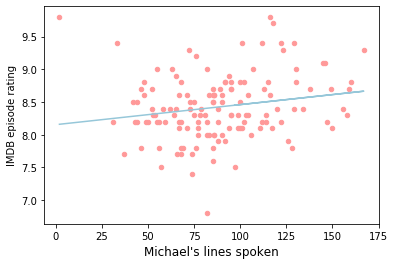

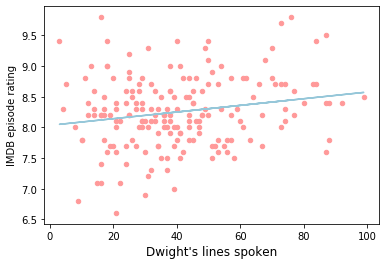

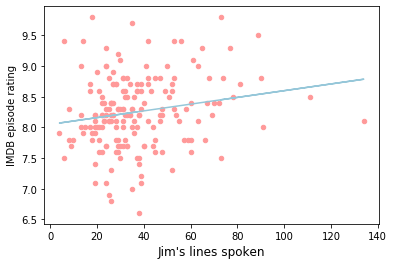

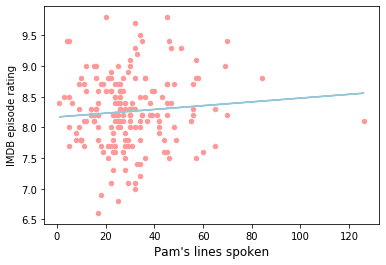

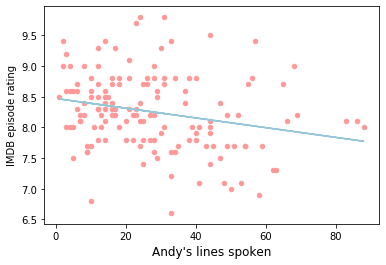

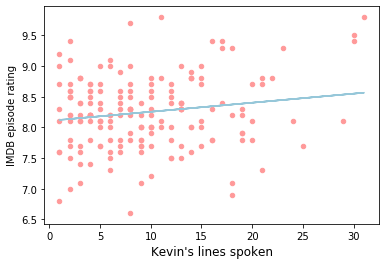

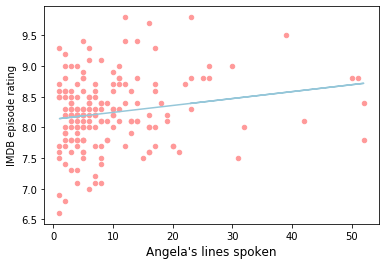

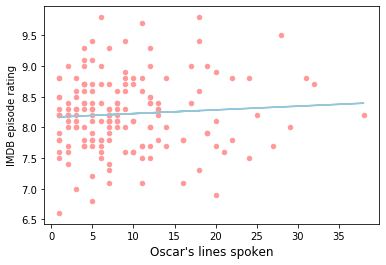

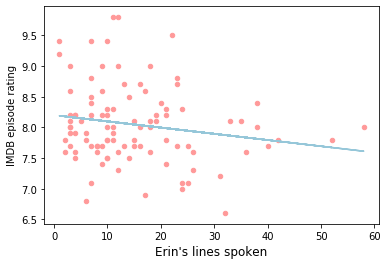

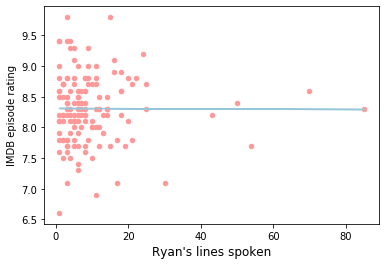

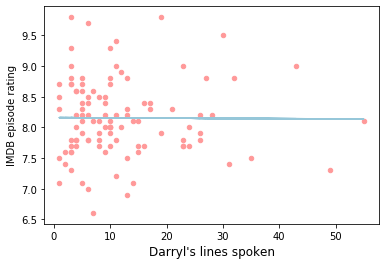

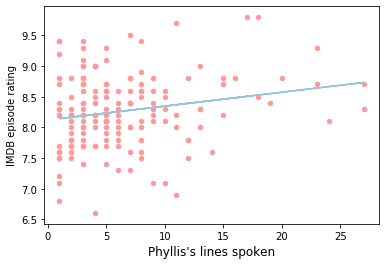

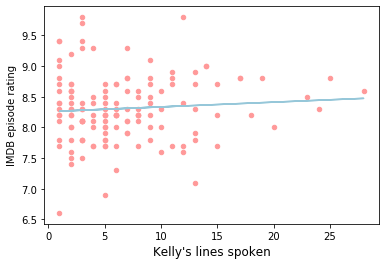

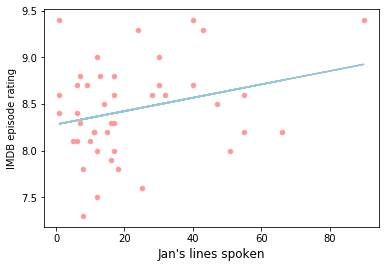

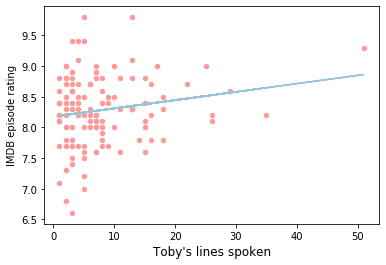

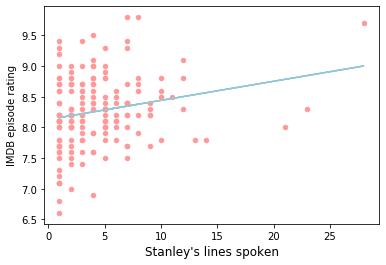

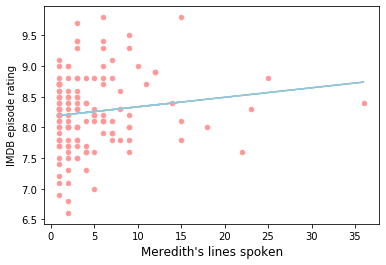

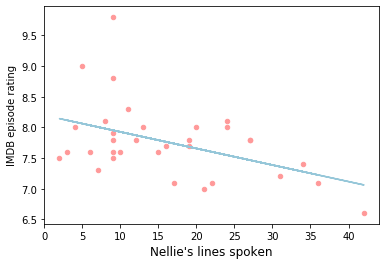

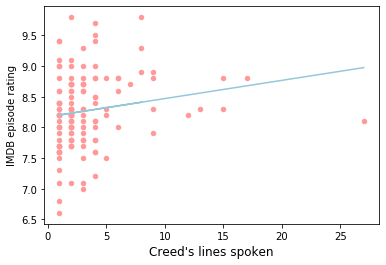

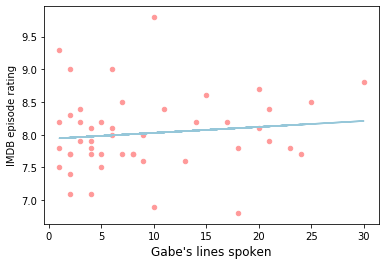

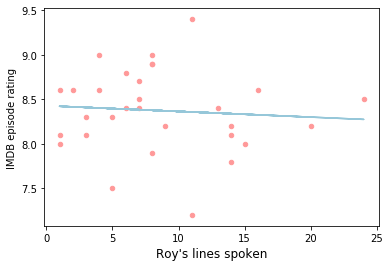

In [8]:
import random
#Calculate correlation between a given character's line count and the episode rating

cor = []

for char in df_condensed['character']:
    character = char
    
    cor.append( round(df_master['rating'].corr(df_master[char]),4) )
    
    df = df_master[['rating',character]].dropna()
    x = df[character].to_numpy()
    y = df['rating'].to_numpy()
    dem = x.dot(x) - x.mean() * x.sum()
    m = (x.dot(y) - y.mean() * x.sum())/dem
    b = (y.mean() * x.dot(x) - x.mean() * x.dot(y))/dem
    line = m*x + b

    df_master.plot(x = character, y='rating', kind = 'scatter', color='#ff9999', legend=None)
    plt.plot(x, line, '#96c7d9')
    plt.xlabel(character + "'s lines spoken", fontsize=12)
    plt.ylabel("IMDB episode rating")
    plt.show()

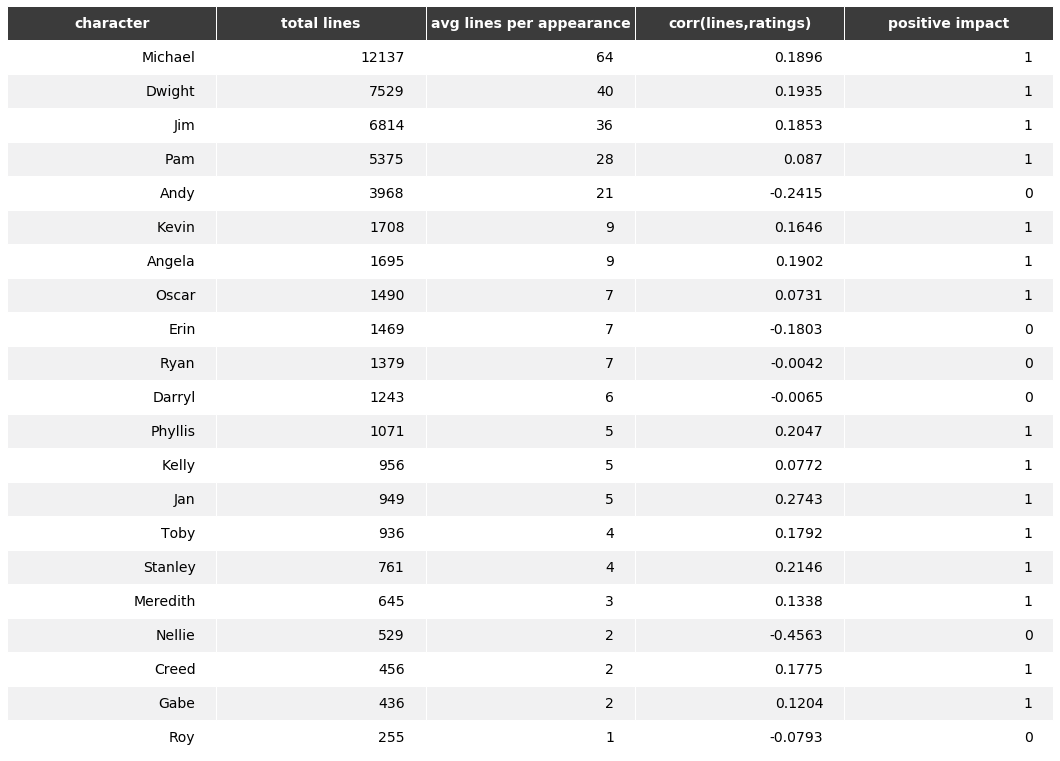

In [9]:
df_condensed["corr(lines,ratings)"] = cor

pos = []

for c in cor:
    if c > 0:
        pos.append(1)
    else:
        pos.append(0)
        
df_condensed["positive impact"] = pos

render_mpl_table(df_condensed, header_columns=0, col_width=3.75)

Michael Min:2.0
Michael Mean:88.5912408759124
Michael Max:167.0
Michael Std:30.849862890467918
Dwight Min:3.0
Dwight Mean:40.47849462365591
Dwight Max:99.0
Dwight Std:20.725544230913176


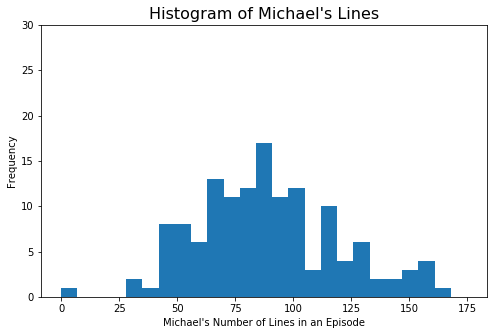

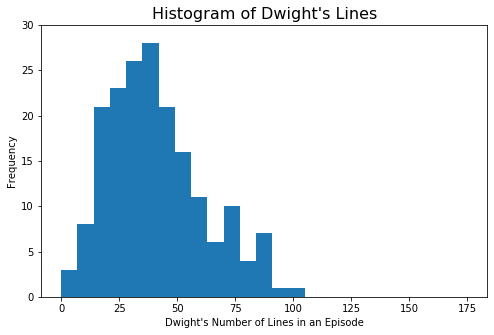

In [10]:
hist = df_master.hist(column = "Michael", sharex=True, sharey=True, figsize=(8,5), grid=False, bins=25, range=[0,175])
pl.ylim(0,30)
pl.title("Histogram of Michael's Lines", fontsize=16)
pl.ylabel("Frequency")
pl.xlabel("Michael's Number of Lines in an Episode")
print('Michael Min:' + str(df_master['Michael'].min()))
print('Michael Mean:' + str(df_master['Michael'].mean()))
print('Michael Max:' + str(df_master['Michael'].max()))
print('Michael Std:' + str(df_master['Michael'].std()))



hist = df_master.hist(column = "Dwight", sharex=True, sharey=True, figsize=(8,5), grid=False, bins=25, range=[0,175])
pl.ylim(0,30)
pl.title("Histogram of Dwight's Lines", fontsize=16)
pl.ylabel("Frequency")
pl.xlabel("Dwight's Number of Lines in an Episode")
print('Dwight Min:' + str(df_master['Dwight'].min()))
print('Dwight Mean:' + str(df_master['Dwight'].mean()))
print('Dwight Max:' + str(df_master['Dwight'].max()))
print('Dwight Std:' + str(df_master['Dwight'].std()))

Now we will Look only at Dwight and Michael

In [11]:
df = pd.read_csv('master.csv')
cols = list(df.columns)
df = df[cols[1:6]]
df_M = df[cols[1:5]]
df_D = df[cols[1:4] + cols[5:6]]
df = df[df['Michael'].notna()]
df = df[df['Dwight'].notna()]
df = df.reset_index()

print('Min:' + str(df['rating'].min()))
print('Mean:' + str(df['rating'].mean()))
print('Max:' + str(df['rating'].max()))
print('Std:' + str(df['rating'].std()))


x = df['rating'].mean()
s = df['rating'].std()
n = df.shape[0]
z = 1.96

mean_lower_bound = x - (z * s / np.sqrt(n))
mean_upper_bound = x + (z * s / np.sqrt(n))
print('95% Confidence Interval for Mean: (' + str(mean_lower_bound) + ' , ' + str(mean_upper_bound) + ')')

std_upper_bound = np.sqrt((n-1)*(s*s)/74.2214)
std_lower_bound = np.sqrt((n-1)*(s*s)/129.561)
print('95% Confidence Interval for std: (' + str(std_lower_bound) + ' , ' + str(std_upper_bound) + ')')

df.tail(8)

Min:6.8
Mean:8.42481751824818
Max:9.8
Std:0.49834741925597426
95% Confidence Interval for Mean: (8.341367199214613 , 8.508267837281746)
95% Confidence Interval for std: (0.5105808500665749 , 0.6745856473062825)


,index,season,episode,rating,Michael,Dwight
129,131,7.0,15.0,8.4,73.0,24.0
130,132,7.0,16.0,9.4,33.0,3.0
131,133,7.0,17.0,7.5,57.0,41.0
132,134,7.0,18.0,9.3,72.0,31.0
133,135,7.0,19.0,7.8,68.0,10.0
134,136,7.0,20.0,9.0,82.0,13.0
135,137,7.0,21.0,9.8,116.0,16.0
136,187,9.0,23.0,9.8,2.0,76.0


In [12]:
test_stat_m = (x - 8.248404255319146)/(s/ np.sqrt(n))
print("Test statistic for mean " + str(test_stat_m))

test_stat_std = (s/0.5787203349443079)*(n-1)
print("Test statistic for std " + str(test_stat_std))



Test statistic for mean 4.143423288793244
Test statistic for std 117.11226464045839


In [13]:
df_M = df_M[df_M['Michael'].notna()]
x_M = df_M['rating'].mean()
n_M = df_M.shape[0]
s_M = df_M['rating'].std()

df_M.tail(5)


,season,episode,rating,Michael
134,7.0,18.0,9.3,72.0
135,7.0,19.0,7.8,68.0
136,7.0,20.0,9.0,82.0
137,7.0,21.0,9.8,116.0
187,9.0,23.0,9.8,2.0


In [14]:
df_D = df_D[df_D['Dwight'].notna()]
x_D = df_D['rating'].mean()
n_D = df_D.shape[0]
s_D = df_D['rating'].std()

df_D.tail(5)

,season,episode,rating,Dwight
183,9.0,19.0,8.0,61.0
184,9.0,20.0,8.0,21.0
185,9.0,21.0,9.0,54.0
186,9.0,22.0,9.5,87.0
187,9.0,23.0,9.8,76.0


In [15]:
print("Avg Michael rating: " + str(x_M) + " with n = " + str(n_M))
m_mean_lower_bound = x_M - (z * s / np.sqrt(n_M))
m_mean_upper_bound = x_M + (z * s / np.sqrt(n_M))
print('95% Confidence Interval for Michaels Mean: (' + str(m_mean_lower_bound) + ' , ' + str(m_mean_upper_bound) + ')')

print("Michael std: " + str(s_M))
m_std_upper_bound = np.sqrt((n_M-1)*(s_M*s_M)/105.609)
m_std_lower_bound = np.sqrt((n_M-1)*(s_M*s_M)/170.175)
print('95% Confidence Interval for std: (' + str(m_std_lower_bound) + ' , ' + str(m_std_upper_bound) + ')')

test_stat_m = (x_M - 8.248404255319146)/(s_M/ np.sqrt(n_M))
print("Test statistic for mean " + str(test_stat_m))

test_stat_std = (s_M/0.5787203349443079)*(n_M-1)
print("Test statistic for std " + str(test_stat_std))


Avg Michael rating: 8.42481751824818 with n = 137
95% Confidence Interval for Michaels Mean: (8.341367199214613 , 8.508267837281746)
Michael std: 0.49834741925597426
95% Confidence Interval for std: (0.44550623664843014 , 0.5655242110876336)
Test statistic for mean 4.143423288793244
Test statistic for std 117.11226464045839


In [16]:
d_mean_lower_bound = x_D - (z * s / np.sqrt(n_D))
d_mean_upper_bound = x_D + (z * s / np.sqrt(n_D))
print("Avg Dwight rating: " + str(x_D) + " with n = " + str(n_D))
print('95% Confidence Interval for Dwights Mean: (' + str(d_mean_lower_bound) + ' , ' + str(d_mean_upper_bound) + ')')

print("Dwight std: " + str(s_D))
d_std_upper_bound = np.sqrt((n_D-1)*(s_D*s_D)/149.227)
d_std_lower_bound = np.sqrt((n_D-1)*(s_D*s_D)/224.557)
print('95% Confidence Interval for std: (' + str(d_std_lower_bound) + ' , ' + str(d_std_upper_bound) + ')')

test_stat_m = (x_D - 8.248404255319146)/(s_D/ np.sqrt(n_D))
print("Test statistic for mean " + str(test_stat_m))

test_stat_std = (s_D/0.5787203349443079)*(n_D-1)
print("Test statistic for std " + str(test_stat_std))



Avg Dwight rating: 8.252150537634407 with n = 186
95% Confidence Interval for Dwights Mean: (8.180530950548425 , 8.323770124720388)
Dwight std: 0.5806061128656902
95% Confidence Interval for std: (0.5269921782249586 , 0.6464631351139244)
Test statistic for mean 0.0879985204626101
Test statistic for std 185.60282816135933


In [74]:
diff = x_M - x_D

print("Avg Michael rating: " + str(x_M) + " with n = " + str(n_M))
print("Avg Dwight rating: " + str(x_D) + " with n = " + str(n_D))
print("Point estimate of difference of means: " + str(diff))

diff_lower = diff - z*(np.sqrt((s_D/n_D) + (s_M/n_M)))
diff_upper = diff + z*(np.sqrt((s_D/n_D) + (s_M/n_M))) 

print("Confidence interval for difference of means: (" + str(diff_lower) + " , " + str(diff_upper) + ")")

Avg Michael rating: 8.42481751824818 with n = 137
Avg Dwight rating: 8.252150537634407 with n = 186
Point estimate of difference of means: 0.17266698061377284
Confidence interval for difference of means: (0.011527911943039648 , 0.333806049284506)


Text(0, 0.5, 'IMDB Rating')

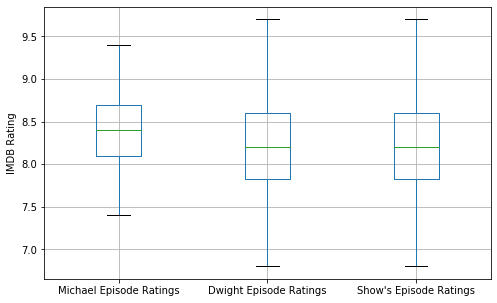

In [27]:
boxplot = pd.DataFrame()

boxplot["Dwight Episode Ratings"] = df_D['rating']
boxplot["Michael Episode Ratings"] = df_M['rating']
boxplot["Show's Episode Ratings"] = df_master['rating']

boxplot.head()

bp = boxplot.boxplot(column = ["Michael Episode Ratings", "Dwight Episode Ratings", "Show's Episode Ratings"], figsize=(8,5), showfliers=False)
bp.set_ylabel("IMDB Rating")